# Setting up your `python` environment

We will be using `python 3` and `ipython`/`jupyter` extensively in this course. You need to set up the correct `python` environment first. Below are some instructions in a Mac OS X 10.11 environment. You should be able to adapt it to other environments -- try Google if any problem.  

## Installing `anaconda` and `jupyter`

1. Download and install the `anaconda` installation package (for `python 3.x`) at https://www.continuum.io/downloads
2. Create a virtual environment, e.g., `py34` by `conda create -n py34 python=3.4 anaconda`. See more at http://conda.pydata.org/docs/using/envs.html
3. Activiate `py34` (or put it on your `~/.bashrc`): `source activate py34`
4. To install a new package in an environment, switch to it and use `conda install -n PACKAGENAME`
5. Install `jupyter` by `conda install jupyter`


### Test you installation

```
% python -V
Python 3.4.3 :: Anaconda 2.3.0 (x86_64)
% ipython -V
5.0.0
% jupyter notebook
```


The last command shall open up a new page in your browser. Also check if you click the "new" button, there is a "python 3" choice under the 'notebooks'. 

## Using `jupyter`

Start with simple tutorial: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html

Press `h` (you may need to press `ESC` first) to learn a few important keyboard shortcuts, e.g., `SHIFT+RETURN`, `B`, `ESC`, `ESC m` (to change the current cell to a `markdown` cell), selecting multiple lines + `TAB` (indent them). Also note that mouse selection = copying to clipboard (sometimes annoying). 

Read the syntax of `markdown` at http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html and try it out by yourself. 

It also can display maths symbols/equations, e.g., $e^{ix} = cos(x) + i \cdot sin(x)$.

$$ P \implies Q  \qquad \equiv \qquad P \lor \neg Q $$

Try out cells with simple python code (or try the following cell in this notebook). 

In [1]:
import random

n = 10
data = [random.randint(1, 10) for _ in range(n)]
data # this print out the variable's content

[10, 9, 9, 6, 1, 9, 7, 6, 5, 4]

In [2]:
import string
import sys
import urllib.request
from bs4 import BeautifulSoup

def get_page(url):
    try :
        web_page = urllib.request.urlopen(url).read()
        soup = BeautifulSoup(web_page, 'html.parser')
        return soup
    except urllib2.HTTPError :
        print("HTTPERROR!")
    except urllib2.URLError :
        print("URLERROR!")
        
def get_titles(sp):
    i = 1
    papers = sp.find_all('div', {'class' : 'data'})
    for paper in papers:
        title = paper.find('span', {'class' : 'title'} )
        print("Paper {}:\t{}".format(i, title.get_text()))
        i += 1
        

In [3]:
sp = get_page('http://dblp.uni-trier.de/pers/hd/m/Manning:Christopher_D=')

In [4]:
get_titles(sp) 

Paper 1:	Understanding Human Language: Can NLP and Deep Learning Help?
Paper 2:	Evaluating the word-expert approach for Named-Entity Disambiguation.
Paper 3:	A Fast Unified Model for Parsing and Sentence Understanding.
Paper 4:	Achieving Open Vocabulary Neural Machine Translation with Hybrid Word-Character Models.
Paper 5:	Improving Coreference Resolution by Learning Entity-Level Distributed Representations.
Paper 6:	Learning Language Games through Interaction.
Paper 7:	A Thorough Examination of the CNN/Daily Mail Reading Comprehension Task.
Paper 8:	Compression of Neural Machine Translation Models via Pruning.
Paper 9:	Natural language translation at the intersection of AI and HCI.
Paper 10:	Computational Linguistics and Deep Learning.
Paper 11:	Natural Language Translation at the Intersection of AI and HCI.
Paper 12:	Text to 3D Scene Generation with Rich Lexical Grounding.
Paper 13:	Leveraging Linguistic Structure For Open Domain Information Extraction.
Paper 14:	Robust Subgraph Gene

## Exercise

1. Compute the top-10 most frequently appearing words in the papers of the author. 

For Manning, the output should be: 


In [5]:
from collections import defaultdict
from pprint import pprint

def titles(sp):
    ret = []
    papers = sp.find_all('div', {'class' : 'data'})
    for paper in papers:
        title = paper.find('span', {'class' : 'title'} )
        ret.append(title.get_text())
    return ret

def top_k_words(lines, k):
    d = defaultdict(int)
    for line in lines:
        for word in line.split():
            d[word] += 1
    #print(d)
    out = [(k, v) for (k, v) in d.items()]
    return out


In [6]:
out = top_k_words(titles(sp), 10)
new_out = sorted(out, key = lambda item: int(-item[1]))
pprint(new_out[:10])

[('for', 74),
 ('and', 48),
 ('of', 37),
 ('Learning', 30),
 ('with', 25),
 ('the', 20),
 ('A', 20),
 ('to', 18),
 ('in', 15),
 ('Parsing', 13)]


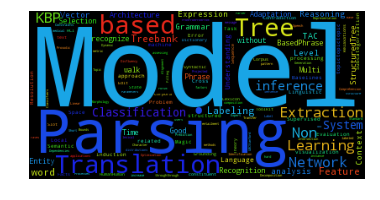

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

from wordcloud import WordCloud, STOPWORDS

all_text = " ".join([item[0] * item[1] for item in new_out])
#print(all_text)
#wordcloud = WordCloud(stopwords=STOPWORDS,
#                      background_color='black',
#                      width=1800,
#                      height=1400
#                     ).generate(all_text)

wordcloud = WordCloud().generate(all_text)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./Christopher_Manning_wordcloud.png', dpi=300)
plt.show()
